In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("./input/stocks/AAPL.csv")
df

,Date,Symbol,LogReturn
0,2010-01-05,AAPL,0.001727
1,2010-01-06,AAPL,-0.016034
2,2010-01-07,AAPL,-0.001850
3,2010-01-08,AAPL,0.006626
4,2010-01-11,AAPL,-0.008861
...,...,...,...
3187,2022-09-01,AAPL,0.004696
3188,2022-09-02,AAPL,-0.013705
3189,2022-09-06,AAPL,-0.008249
3190,2022-09-07,AAPL,0.009211


<AxesSubplot:>

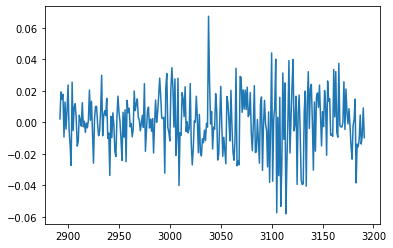

In [14]:
df["LogReturn"].tail(300).plot()

          1_x       1_y
1_x  1.000000  0.054354
1_y  0.054354  1.000000


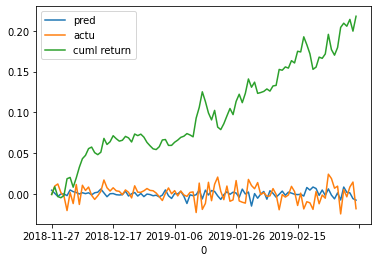

In [15]:
import json
with open("./out.json", "rt") as F:
    js = json.load(F)
left = list(map(lambda x: (x[0],x[1][0]),js.items()))
right = list(map(lambda x: (x[0], x[1][1]),js.items()))
mst = pd.merge(pd.DataFrame(left),pd.DataFrame(right),on=0).set_index(0)
print(mst.corr())
mst.columns = ["pred","actu"]
mst.plot()
mst["sign"] = np.sign(mst["pred"])
mst["cumul"] = (mst["sign"] * mst["actu"]).cumsum()
mst["cumul"].plot(label="cuml return")
plt.legend()

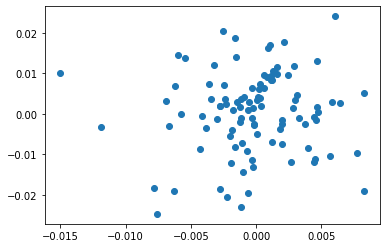

In [16]:
plt.scatter(mst["pred"], mst["actu"])

<AxesSubplot:xlabel='0'>

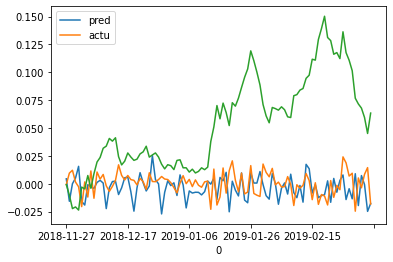

In [17]:
import json
with open("./out2.json", "rt") as F:
    js = json.load(F)
left = list(map(lambda x: (x[0],x[1][0]),js.items()))
right = list(map(lambda x: (x[0], x[1][1]),js.items()))
mst = pd.merge(pd.DataFrame(left),pd.DataFrame(right),on=0).set_index(0)
mst.columns = ["pred","actu"]
mst.plot()
mst["sign"] = np.sign(mst["pred"])
mst["cumul"] = (mst["sign"] * mst["actu"]).cumsum()
mst["cumul"].plot()

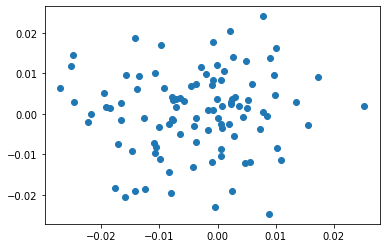

In [18]:
plt.scatter(mst["pred"], mst["actu"])